DA24C026 - Assignment 7

TASK 1

In [391]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt 

In [305]:
df = pd.read_csv("aps_failure_training_set.csv", skiprows = 20)

In [306]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [307]:
df['class'].describe()

count     60000
unique        2
top         neg
freq      59000
Name: class, dtype: object

Data Preprocessing

In [308]:
df.replace('na', np.nan, inplace=True)

In [309]:
df.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Dropping Columns which have more than 50% missing values as they don't add enough new info for training

In [310]:
df = df.dropna(axis=1, thresh=0.5*len(df))

In [311]:
df.shape

(60000, 163)

In [312]:
df.isna().sum()

class         0
aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 163, dtype: int64

In [313]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

Handling missing values of remaining coloumns

In [314]:
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [315]:
X.isna().sum()

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 162, dtype: int64

Scaling dow data for faster convergence

In [316]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(X)

Data dimensionality reduction

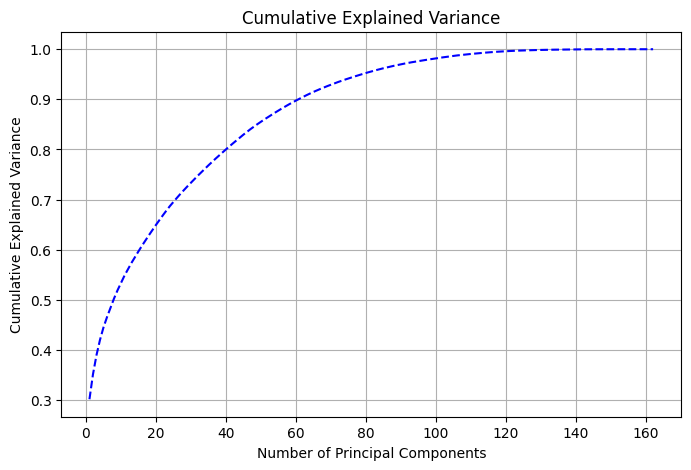

Number of Components: 1, Cumulative Explained Variance: 0.3017
Number of Components: 2, Cumulative Explained Variance: 0.3512
Number of Components: 3, Cumulative Explained Variance: 0.3894
Number of Components: 4, Cumulative Explained Variance: 0.4199
Number of Components: 5, Cumulative Explained Variance: 0.4449
Number of Components: 6, Cumulative Explained Variance: 0.4653
Number of Components: 7, Cumulative Explained Variance: 0.4840
Number of Components: 8, Cumulative Explained Variance: 0.5024
Number of Components: 9, Cumulative Explained Variance: 0.5188
Number of Components: 10, Cumulative Explained Variance: 0.5338
Number of Components: 11, Cumulative Explained Variance: 0.5483
Number of Components: 12, Cumulative Explained Variance: 0.5612
Number of Components: 13, Cumulative Explained Variance: 0.5737
Number of Components: 14, Cumulative Explained Variance: 0.5854
Number of Components: 15, Cumulative Explained Variance: 0.5968
Number of Components: 16, Cumulative Explained Va

In [317]:
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

for i, cumulative_var in enumerate(cumulative_variance):
    print(f'Number of Components: {i+1}, Cumulative Explained Variance: {cumulative_var:.4f}')

As it can be seen in the graph, if we have 60 components then more than 90% variance is captured

In [318]:
pca = PCA(n_components=60)
X_pca = pca.fit_transform(x_scaled)

Splitting Data and training models

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 42)

1.) SVC

In [320]:
svc = SVC()
svc_param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [321]:
svc_grid = GridSearchCV(svc, svc_param_grid, cv=5, scoring = 'f1_macro')
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1_macro')

In [322]:
svc_best = svc_grid.best_estimator_
print ("Best parameters for SVC: ", svc_grid.best_params_)

Best parameters for SVC:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [323]:
y_train_pred_svc = svc_best.predict(X_train)
y_test_pred_svc = svc_best.predict(X_test)

f1_macro_train_svc = f1_score(y_train, y_train_pred_svc, average='macro')
f1_macro_test_svc = f1_score(y_test, y_test_pred_svc, average='macro')

print("SVC Performance on Train Set:\n", f1_macro_train_svc)
print("SVC Performance on Test Set:\n", f1_macro_test_svc)

SVC Performance on Train Set:
 0.9790807359965954
SVC Performance on Test Set:
 0.7851316110119919


2.) Logistic Regression

In [324]:
log_reg = LogisticRegression(solver='liblinear')
log_reg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10], 
}

In [325]:
log_reg = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring = "f1_macro")
log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [326]:
log_reg_best = log_reg.best_estimator_
print ("Best parameters for Logistic Regression: ", log_reg.best_params_)

Best parameters for Logistic Regression:  {'C': 10, 'penalty': 'l1'}


In [327]:
y_train_pred_log_reg = log_reg_best.predict(X_train)
y_test_pred_log_reg = log_reg_best.predict(X_test)

f1_macro_train_log_reg = f1_score(y_train, y_train_pred_log_reg, average='macro')
f1_macro_test_log_reg = f1_score(y_test, y_test_pred_log_reg, average='macro')

print("Logistic Regression Performance on Train Set:\n", f1_macro_train_log_reg)
print("Logistic Regression Performance on Test Set:\n", f1_macro_test_log_reg)

Logistic Regression Performance on Train Set:
 0.8243212359917116
Logistic Regression Performance on Test Set:
 0.835307388606881


3.) Decision Tree

In [328]:
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [329]:
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, scoring = "f1_macro")
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='f1_macro')

In [330]:
dt_best = dt_grid.best_estimator_
print ("Best parameters for Decision Tree: ", dt_grid.best_params_)

Best parameters for Decision Tree:  {'max_depth': 10, 'min_samples_leaf': 1}


In [331]:
y_train_pred_dt = dt_best.predict(X_train)
y_test_pred_dt = dt_best.predict(X_test)

f1_macro_train_dt = f1_score(y_train, y_train_pred_dt, average='macro')
f1_macro_test_dt = f1_score(y_test, y_test_pred_dt, average='macro')

print("Decision Tree Performance on Train Set:\n", f1_macro_train_dt)
print("Decision Tree Performance on Test Set:\n", f1_macro_test_dt)

Decision Tree Performance on Train Set:
 0.9574379762054479
Decision Tree Performance on Test Set:
 0.7885611433218309


Baseline Macro F1 Scores : SVC - 0.78, Logistic Reg - 0.83, Decision Tree - 0.79

TASK 2

Subtask 1 - Oversampling Minority Class

Using Smote for oversampling - Smote is used to oversample dataset based on no,of neighbors. 

In [332]:
sm = SMOTE(random_state=12, sampling_strategy = 0.25)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [333]:
y_train_res.describe()

count     55317
unique        2
top         neg
freq      44254
Name: class, dtype: object

Training models for different oversampling strategies

1.) SVC

In [366]:
clf = SVC(C=10, kernel='rbf', gamma='scale').fit(x_train_res,y_train_res)

In [367]:
y_train_pred_svc_os = clf.predict(X_train)
f1_macro_train_os_svc = f1_score(y_train, y_train_pred_svc_os, average='macro')
y_test_pred_svc_os = clf.predict(X_test)
f1_macro_test_os_svc = f1_score(y_test, y_test_pred_svc_os, average = "macro")
print(" Upon oversampling, F1 Score for SVC on training set :", f1_macro_train_os_svc)
print(" Upon oversampling, F1 Score for SVC on test set :", f1_macro_test_os_svc)

 Upon oversampling, F1 Score for SVC on training set : 0.9790807359965954
 Upon oversampling, F1 Score for SVC on test set : 0.7942521597522247


2.) Logistic Regression

In [368]:
sm = SMOTE(random_state=12, sampling_strategy = 0.06)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [369]:
clf = LogisticRegression(solver='liblinear', C = 10, penalty='l1', max_iter = 500).fit(x_train_res,y_train_res)

In [370]:
y_train_pred_logreg_os = clf.predict(X_train)
f1_macro_train_os_logreg = f1_score(y_train, y_train_pred_logreg_os, average='macro')
y_test_pred_logreg_os = clf.predict(X_test)
f1_macro_test_os_logreg = f1_score(y_test, y_test_pred_logreg_os, average = "macro")
print(" Upon oversampling, F1 Score for Logistic Regression on training set :", f1_macro_train_os_logreg)
print(" Upon oversampling, F1 Score for Logistic Regression on test set :", f1_macro_test_os_logreg)

 Upon oversampling, F1 Score for Logistic Regression on training set : 0.8488898122715383
 Upon oversampling, F1 Score for Logistic Regression on test set : 0.8400754227724834


3.) Decision Tree

In [371]:
sm = SMOTE(random_state=12, sampling_strategy = 0.02)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [372]:
clf = DecisionTreeClassifier()

In [373]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1).fit(x_train_res, y_train_res)

In [374]:
y_train_pred_dtree_os = clf.predict(X_train)
f1_macro_train_os_dtree = f1_score(y_train, y_train_pred_dtree_os, average='macro')
y_test_pred_dtree_os = clf.predict(X_test)
f1_macro_test_os_dtree = f1_score(y_test, y_test_pred_dtree_os, average = "macro")
print(" Upon oversampling, F1 Score for Decision Tree on training set :", f1_macro_train_os_dtree)
print(" Upon oversampling, F1 Score for Decision Tree on test set :", f1_macro_test_os_dtree)

 Upon oversampling, F1 Score for Decision Tree on training set : 0.9626167990642506
 Upon oversampling, F1 Score for Decision Tree on test set : 0.8039748989858151


Subtask 2 - Assigning class weights

SVC

In [375]:
clf = SVC(C=10, kernel='rbf', gamma='scale', class_weight= {'neg':1, 'pos':2}).fit(X_train,y_train)

In [376]:
y_train_pred_svc_cw = clf.predict(X_train)
f1_macro_train_cw_svc = f1_score(y_train, y_train_pred_svc_cw, average='macro')
y_test_pred_svc_cw = clf.predict(X_test)
f1_macro_test_cw_svc = f1_score(y_test, y_test_pred_svc_cw, average = "macro")
print(" Upon assigning Class weights, F1 Score for SVC on training set :", f1_macro_train_cw_svc)
print(" Upon assigning Class weights, F1 Score for SVC on test set :", f1_macro_test_cw_svc)

 Upon assigning Class weights, F1 Score for SVC on training set : 0.9856597439968171
 Upon assigning Class weights, F1 Score for SVC on test set : 0.7861070775130975


Logistic Regression

In [377]:
clf = LogisticRegression(solver='liblinear', C = 10, penalty='l1', max_iter = 500, class_weight={'neg':4, 'pos':11}).fit(X_train,y_train)

In [378]:
y_train_pred_logreg_cw = clf.predict(X_train)
f1_macro_train_cw_logreg = f1_score(y_train, y_train_pred_logreg_cw, average='macro')
y_test_pred_logreg_cw = clf.predict(X_test)
f1_macro_test_cw_logreg = f1_score(y_test, y_test_pred_logreg_cw, average = "macro")
print(" Upon assigning Class weights, F1 Score for Logistic Regresion on training set :", f1_macro_train_cw_logreg)
print(" Upon assigning Class weights, F1 Score for Logistic Regresion on test set :", f1_macro_test_cw_logreg)

 Upon assigning Class weights, F1 Score for Logistic Regresion on training set : 0.8457921283439009
 Upon assigning Class weights, F1 Score for Logistic Regresion on test set : 0.8446141718090743


Decision Tree

In [379]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, class_weight={'neg':4, 'pos':11}).fit(X_train, y_train)

In [410]:
y_train_pred_dtree_cw = clf.predict(X_train)
f1_macro_train_cw_dtree = f1_score(y_train, y_train_pred_dtree_cw, average='macro')
y_test_pred_dtree_cw = clf.predict(X_test)
f1_macro_test_cw_dtree = f1_score(y_test, y_test_pred_dtree_cw, average = "macro")
print(" Upon assigning Class weights, F1 Score for Decision on training set :", f1_macro_train_cw_dtree)
print(" Upon assigning Class weights, F1 Score for Decision Regresion on test set :", f1_macro_test_cw_dtree)

 Upon assigning Class weights, F1 Score for Decision on training set : 0.9590298235571053
 Upon assigning Class weights, F1 Score for Decision Regresion on test set : 0.816793893129771


Subtask - 3 Assigning sample weights instead of class weights, to penalize misclassifications

Main Difference between sample weights and class weights is Sample weights are assigned to each individual sample (data point) in the training dataset. Thus, it's parameter is specified while fitting the model. While, Class weights are assigned to each class (category) in a classification problem. Thus, it's parameter is specfied while making object of class.

SVC

In [381]:
weights = {'neg': 0.475, 'pos': 1}
sw = np.array([weights[class_] for class_ in y_train])

In [382]:
clf = SVC(C=10, kernel='rbf', gamma='scale').fit(X_train,y_train, sample_weight= sw)

In [383]:
y_train_pred_svc_sw = clf.predict(X_train)
f1_macro_train_sw_svc = f1_score(y_train, y_train_pred_svc_sw, average='macro')
y_test_pred_svc_sw = clf.predict(X_test)
f1_macro_test_sw_svc = f1_score(y_test, y_test_pred_svc_sw, average = "macro")
print(" Upon assigning Sample weights, F1 Score for SVC on training set :", f1_macro_train_sw_svc)
print(" Upon assigning Sample weights, F1 Score for SVC on test set :", f1_macro_test_sw_svc)

 Upon assigning Sample weights, F1 Score for SVC on training set : 0.9796171911702234
 Upon assigning Sample weights, F1 Score for SVC on test set : 0.7865366157429332


Logistic Regression

In [384]:
weights = {'neg': 0.75, 'pos': 2.25}
sw = np.array([weights[class_] for class_ in y_train])

In [385]:
clf = LogisticRegression(solver='liblinear', C = 10, penalty='l1', max_iter = 500).fit(X_train,y_train, sample_weight=sw)

In [386]:
y_train_pred_logreg_sw = clf.predict(X_train)
f1_macro_train_sw_logreg = f1_score(y_train, y_train_pred_logreg_sw, average='macro')
y_test_pred_logreg_sw = clf.predict(X_test)
f1_macro_test_sw_logreg = f1_score(y_test, y_test_pred_logreg_sw, average = "macro")
print(" Upon assigning Sample weights, F1 Score for Logistic Regresion on training set :", f1_macro_train_sw_logreg)
print(" Upon assigning Sample weights, F1 Score for Logistic Regresion on test set :", f1_macro_test_sw_logreg)

 Upon assigning Sample weights, F1 Score for Logistic Regresion on training set : 0.8431944395038975
 Upon assigning Sample weights, F1 Score for Logistic Regresion on test set : 0.8403600017355732


Decision Tree

In [387]:
weights = {'neg': 0.75, 'pos': 2.15}
sw = np.array([weights[class_] for class_ in y_train])

In [388]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1).fit(X_train, y_train, sample_weight=sw)

In [389]:
y_train_pred_dtree_sw = clf.predict(X_train)
f1_macro_train_sw_dtree = f1_score(y_train, y_train_pred_dtree_sw, average='macro')
y_test_pred_dtree_sw = clf.predict(X_test)
f1_macro_test_sw_dtree = f1_score(y_test, y_test_pred_dtree_sw, average = "macro")
print(" Upon assigning Sample weights, F1 Score for Decision Tree on training set :", f1_macro_train_sw_dtree)
print(" Upon assigning Sample weights, F1 Score for Decision Tree on test set :", f1_macro_test_sw_dtree)

 Upon assigning Sample weights, F1 Score for Decision Tree on training set : 0.9590298235571053
 Upon assigning Sample weights, F1 Score for Decision Tree on test set : 0.816793893129771


Subtask 4 - A different way to handle Imbalance

Stratified K-fold cross validation which takes enough samples from both classes 

In [443]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Classifiers
svc = SVC()
logreg = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier()

smote = SMOTE(sampling_strategy=0.06)

svc_pipeline = ImbPipeline([('smote', smote), ('svc', svc)])
logreg_pipeline = ImbPipeline([('smote', smote), ('logisticregression', logreg)])
dt_pipeline = ImbPipeline([('smote', smote), ('decisiontreeclassifier', dt)])

svc_pipeline.fit(X_train, y_train)
logreg_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

svc_test_pred = svc_pipeline.predict(X_test)
logreg_test_pred = logreg_pipeline.predict(X_test)
dt_test_pred = dt_pipeline.predict(X_test)

svc_kvc = f1_score(y_test, svc_test_pred, average='macro')
logreg_kcv = f1_score(y_test, logreg_test_pred, average='macro')
dtree_kcv = f1_score(y_test, dt_test_pred, average='macro')

print("SVC F1 Macro Score (Test):", svc_kvc)
print("Logistic Regression F1 Macro Score (Test):", logreg_kcv)
print("Decision Tree F1 Macro Score (Test):", dtree_kcv)

SVC F1 Macro Score (Test): 0.850736519594085
Logistic Regression F1 Macro Score (Test): 0.8394369441196272
Decision Tree F1 Macro Score (Test): 0.7771914047514632


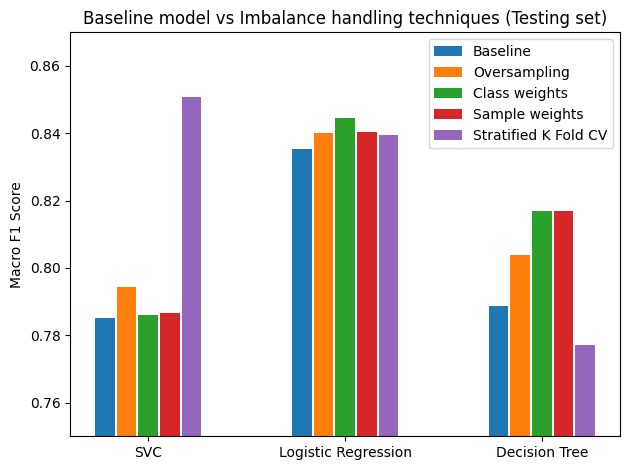

In [448]:
x, width = np.arange(3), 0.1
spacing = 0.01

plt.bar(x - 2*(width + spacing), [f1_macro_test_svc, f1_macro_test_log_reg, f1_macro_test_dt], width, label='Baseline')
plt.bar(x - (width + spacing), [f1_macro_test_os_svc, f1_macro_test_os_logreg, f1_macro_test_os_dtree], width, label='Oversampling')
plt.bar(x, [f1_macro_test_cw_svc, f1_macro_test_cw_logreg, f1_macro_test_cw_dtree], width, label='Class weights')
plt.bar(x + (width + spacing), [f1_macro_test_sw_svc, f1_macro_test_sw_logreg, f1_macro_test_sw_dtree], width, label='Sample weights')
plt.bar(x + 2*(width + spacing), [svc_kvc, logreg_kcv, dtree_kcv], width, label='Stratified K Fold CV')

plt.ylabel('Macro F1 Score')
plt.title('Baseline model vs Imbalance handling techniques (Testing set)')
plt.xticks(x,['SVC', 'Logistic Regression', 'Decision Tree'])
plt.ylim(0.75, 0.87)
plt.legend()
plt.tight_layout()
plt.show()